## 라이브러리 호출

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

## 전처리: 19~22년 누적설치수

In [ ]:
# 파일호출, 전처리
cctv_df = pd.read_excel('./서울시_자치구별_CCTV.xlsx')
cctv_df = cctv_df.set_axis(labels=cctv_df.loc[1],axis=1)
cctv_df = cctv_df.set_axis(labels=cctv_df['구분'], axis=0)
cctv_df = cctv_df.drop(labels=cctv_df.columns[:7], axis=1)
cctv_df = cctv_df.drop(labels=cctv_df.columns[-1], axis=1)
cctv_df = cctv_df.drop(labels =cctv_df.index[:3], axis=0)
cctv_df = cctv_df.sort_index()
cctv_df = cctv_df.rename_axis(columns='cctv누적설치수')
cctv_df.info()
cctv_df = cctv_df.astype(int)
cctv_df.columns = ['2019', '2020', '2021', '2022']
display(cctv_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2019년   25 non-null     object
 1   2020년   25 non-null     object
 2   2021년   25 non-null     object
 3   2022년   25 non-null     object
dtypes: object(4)
memory usage: 1000.0+ bytes


,2019,2020,2021,2022
구분,,,,
강남구,5459,5796,6143,6495
강동구,1871,2475,2720,3086
강북구,1656,2337,2960,3184
강서구,1858,2346,2637,3151
관악구,3388,3652,3833,4029


## 구별 누적설치수 시각화

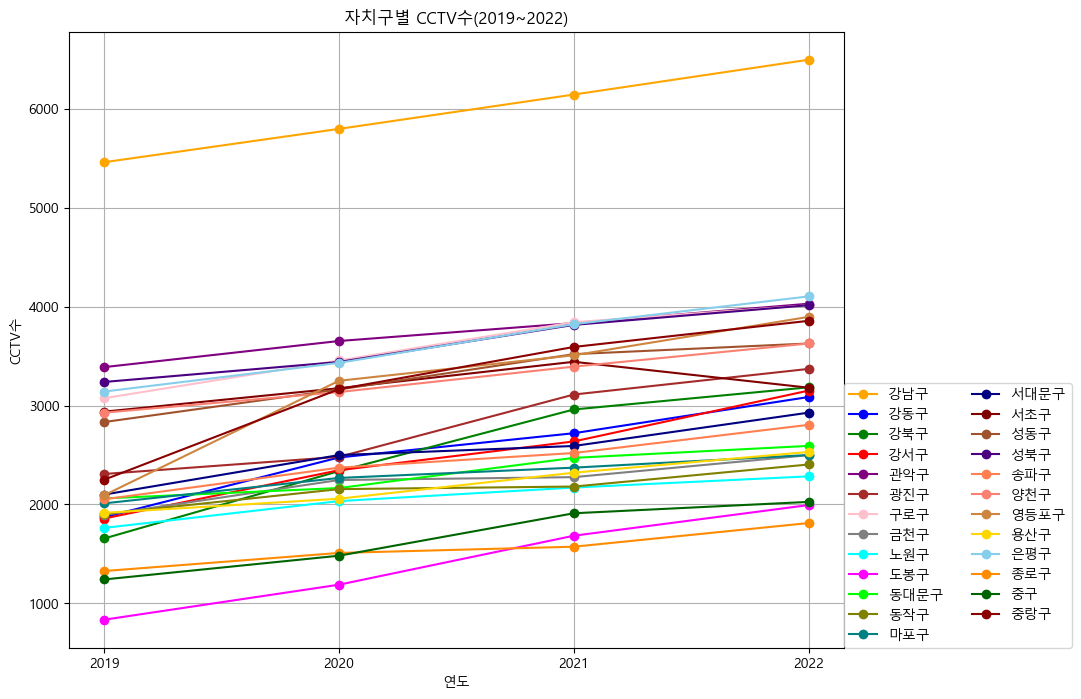

In [ ]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in cctv_df.iterrows():
    plt.plot(cctv_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 CCTV수(2019~2022)')
plt.xlabel('연도')
plt.ylabel('CCTV수')
plt.legend(loc=(1,0), ncol=2)
plt.grid(True)

plt.show()

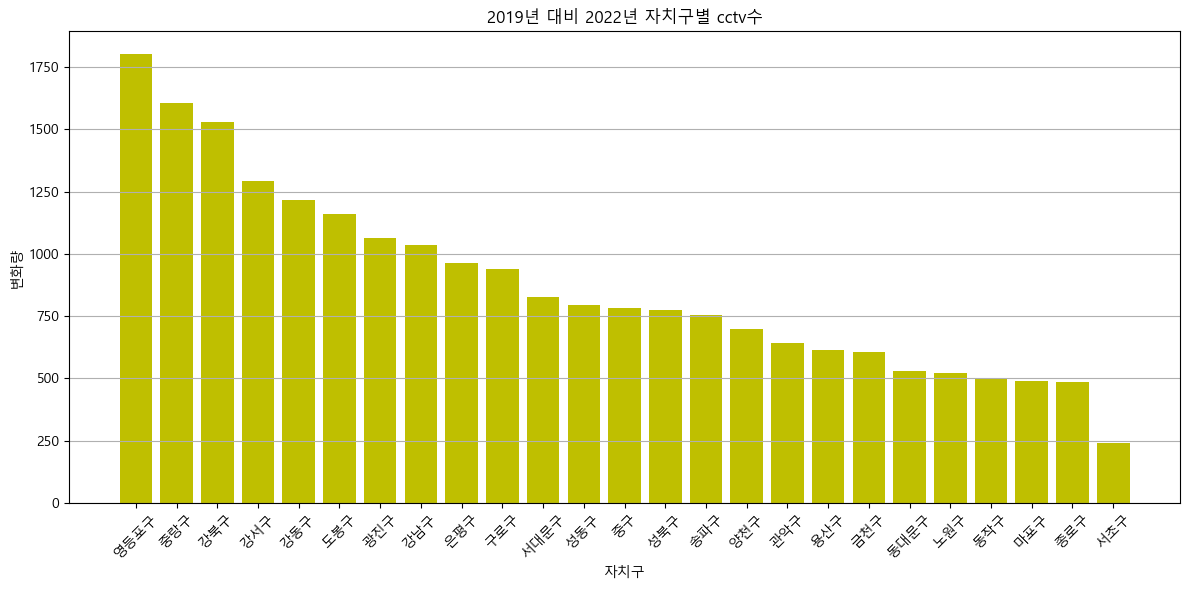

In [ ]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 자치구별 cctv수')
    plt.xlabel('자치구')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    df.drop(['변화량'], axis=1, inplace=True)
delta_graph(cctv_df)

## 6개구 누적설치수 시각화


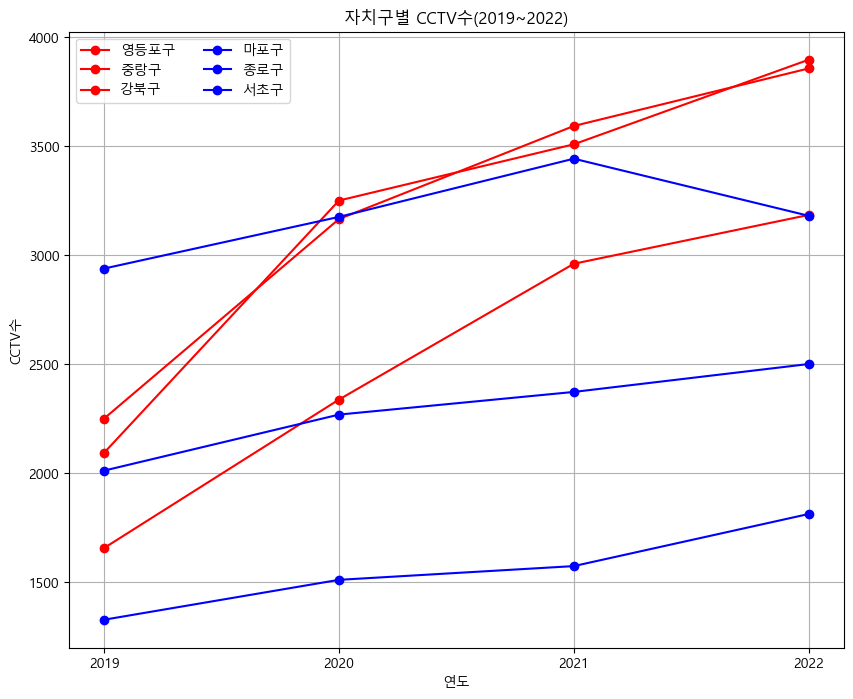

In [ ]:
target_df = cctv_df.loc[['영등포구', '중랑구', '강북구', '마포구', '종로구', '서초구']]
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in target_df.iterrows():
    plt.plot(target_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 CCTV수(2019~2022)')
plt.xlabel('연도')
plt.ylabel('CCTV수')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()

## 19년~22년 전년대비 변화율 증감비 시각화

누적설치수,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구분,,,,,,,,,
강남구,2319,3447,4232,4834,5459,5796,6143,6495,6829
강동구,670,863,1134,1596,1871,2475,2720,3086,3435
강북구,608,840,841,1159,1656,2337,2960,3184,3191
강서구,801,960,1164,1386,1858,2346,2637,3151,3397
관악구,1496,2048,2611,3247,3388,3652,3833,4029,4210


C:\Users\qooqp\AppData\Local\Temp\ipykernel_19392\1232503162.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  delta_cctv_df = delta_cctv_df.applymap(lambda x : x*100)


,2019,2020,2021,2022
구분,,,,
강남구,12.929251,6.173292,5.986888,5.730099
강동구,17.230576,32.282202,9.898990,13.455882
강북구,42.881795,41.123188,26.658109,7.567568
강서구,34.054834,26.264801,12.404092,19.491847
관악구,4.342470,7.792208,4.956188,5.113488


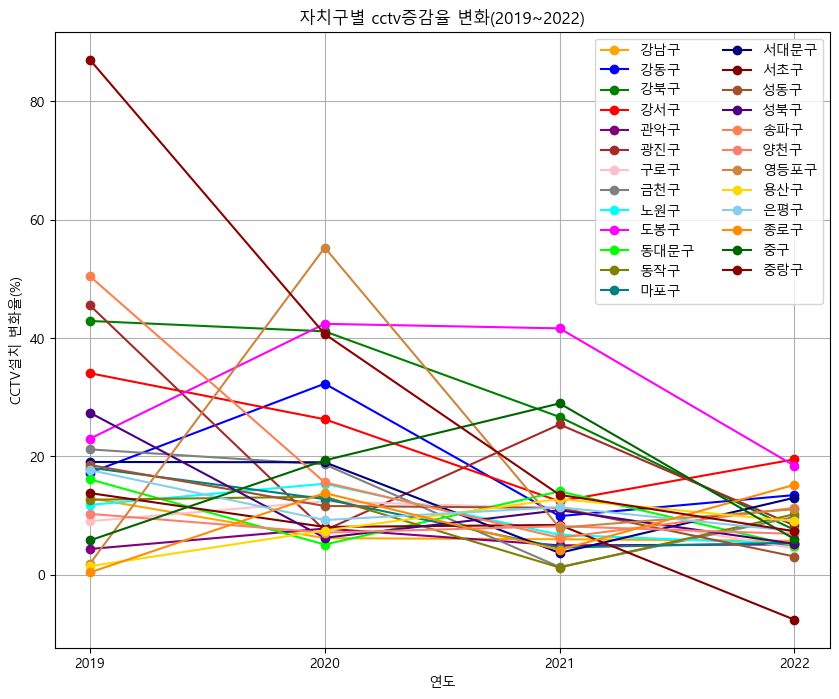

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# 파일호출, 전처리
cctv_df = pd.read_excel('./서울시_자치구별_CCTV.xlsx')
cctv_df = cctv_df.set_axis(labels=cctv_df.loc[1],axis=1)
cctv_df = cctv_df.set_axis(labels=cctv_df['구분'], axis=0)
cctv_df = cctv_df.drop(labels=cctv_df.columns[:3], axis=1)
cctv_df = cctv_df.drop(labels =cctv_df.index[:3], axis=0)
cctv_df = cctv_df.sort_index()
cctv_df = cctv_df.rename_axis(columns='누적설치수')
cctv_df = cctv_df.astype(int)

display(cctv_df.head())


# 전년대비 변화율 구하는 함수
def delta_cctv(x):
    last_year = list(cctv_df.columns).index(x)-1
    return np.array(cctv_df[x])/np.array(cctv_df.iloc[:,last_year]) -1


# 19년~23년 변화율(%) DF
delta_cctv_df = pd.DataFrame(index=cctv_df.index)
for i in cctv_df.columns[4:-1]:
    delta_cctv_df[i] = delta_cctv(i)

delta_cctv_df = delta_cctv_df.applymap(lambda x : x*100)
delta_cctv_df.columns = ['2019', '2020', '2021', '2022']
display(delta_cctv_df.head())


colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in delta_cctv_df.iterrows():
    plt.plot(delta_cctv_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 cctv증감율 변화(2019~2022)')
plt.xlabel('연도')
plt.ylabel('CCTV설치 변화율(%)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()


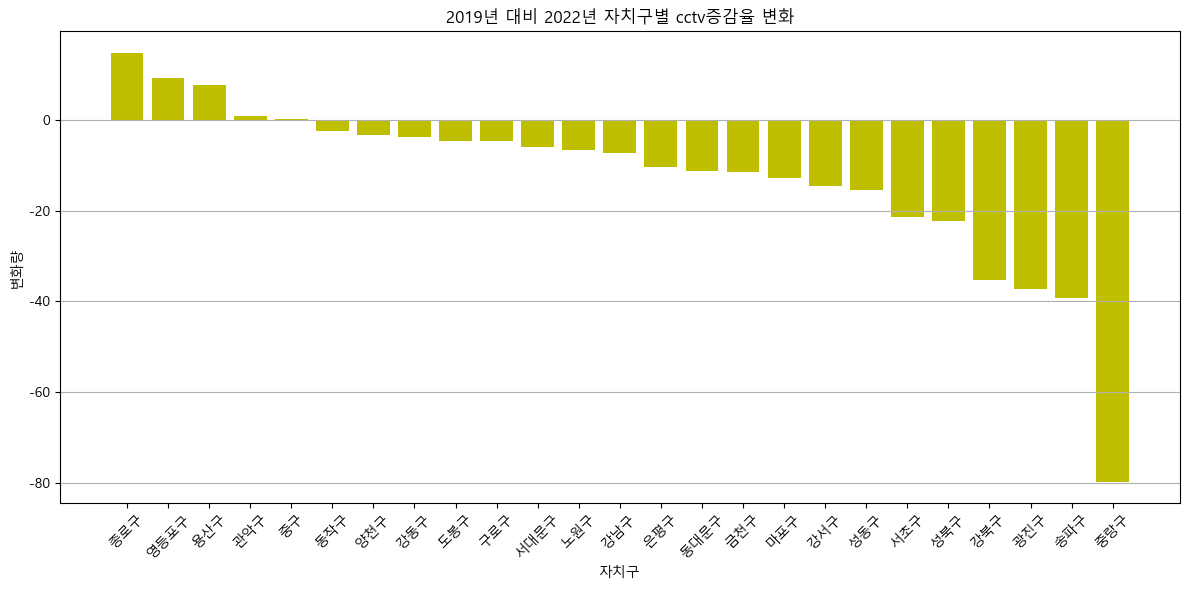

In [ ]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 자치구별 cctv증감율 변화')
    plt.xlabel('자치구')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    df.drop(['변화량'], axis=1, inplace=True)

delta_graph(delta_cctv_df)

## 19~22년 6개구 전년대비 변화율 증감비 시각화

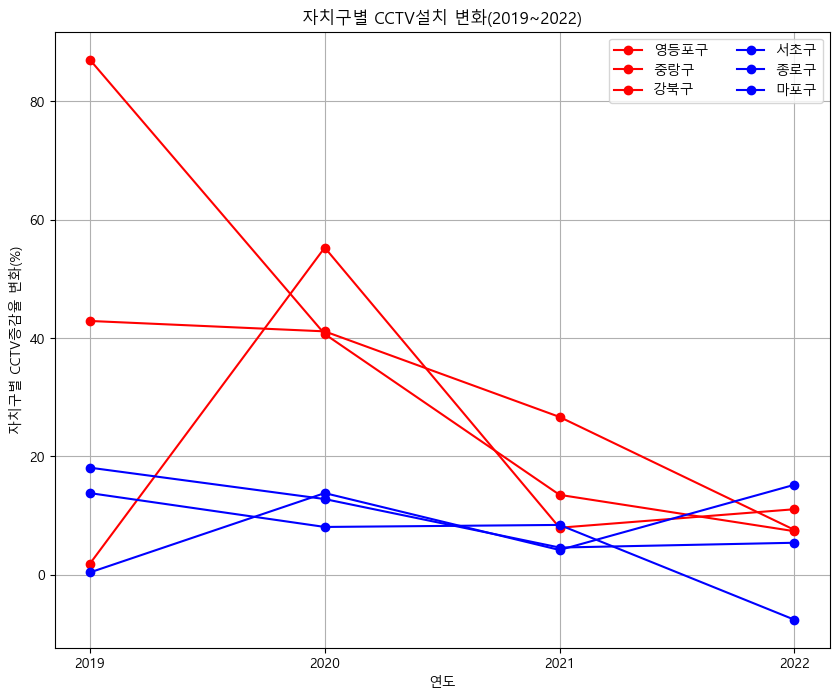

In [ ]:
target_delta_cctv_df = delta_cctv_df.loc[['영등포구', '중랑구', '강북구', '서초구', '종로구', '마포구']]
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))
for index, row in target_delta_cctv_df.iterrows():
    plt.plot(target_delta_cctv_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 CCTV설치 변화(2019~2022)')
plt.xlabel('연도')
plt.ylabel('자치구별 CCTV증감율 변화(%)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()

## 19년~22년 전년대비 변화율 증감비 구별로 각각 시각화

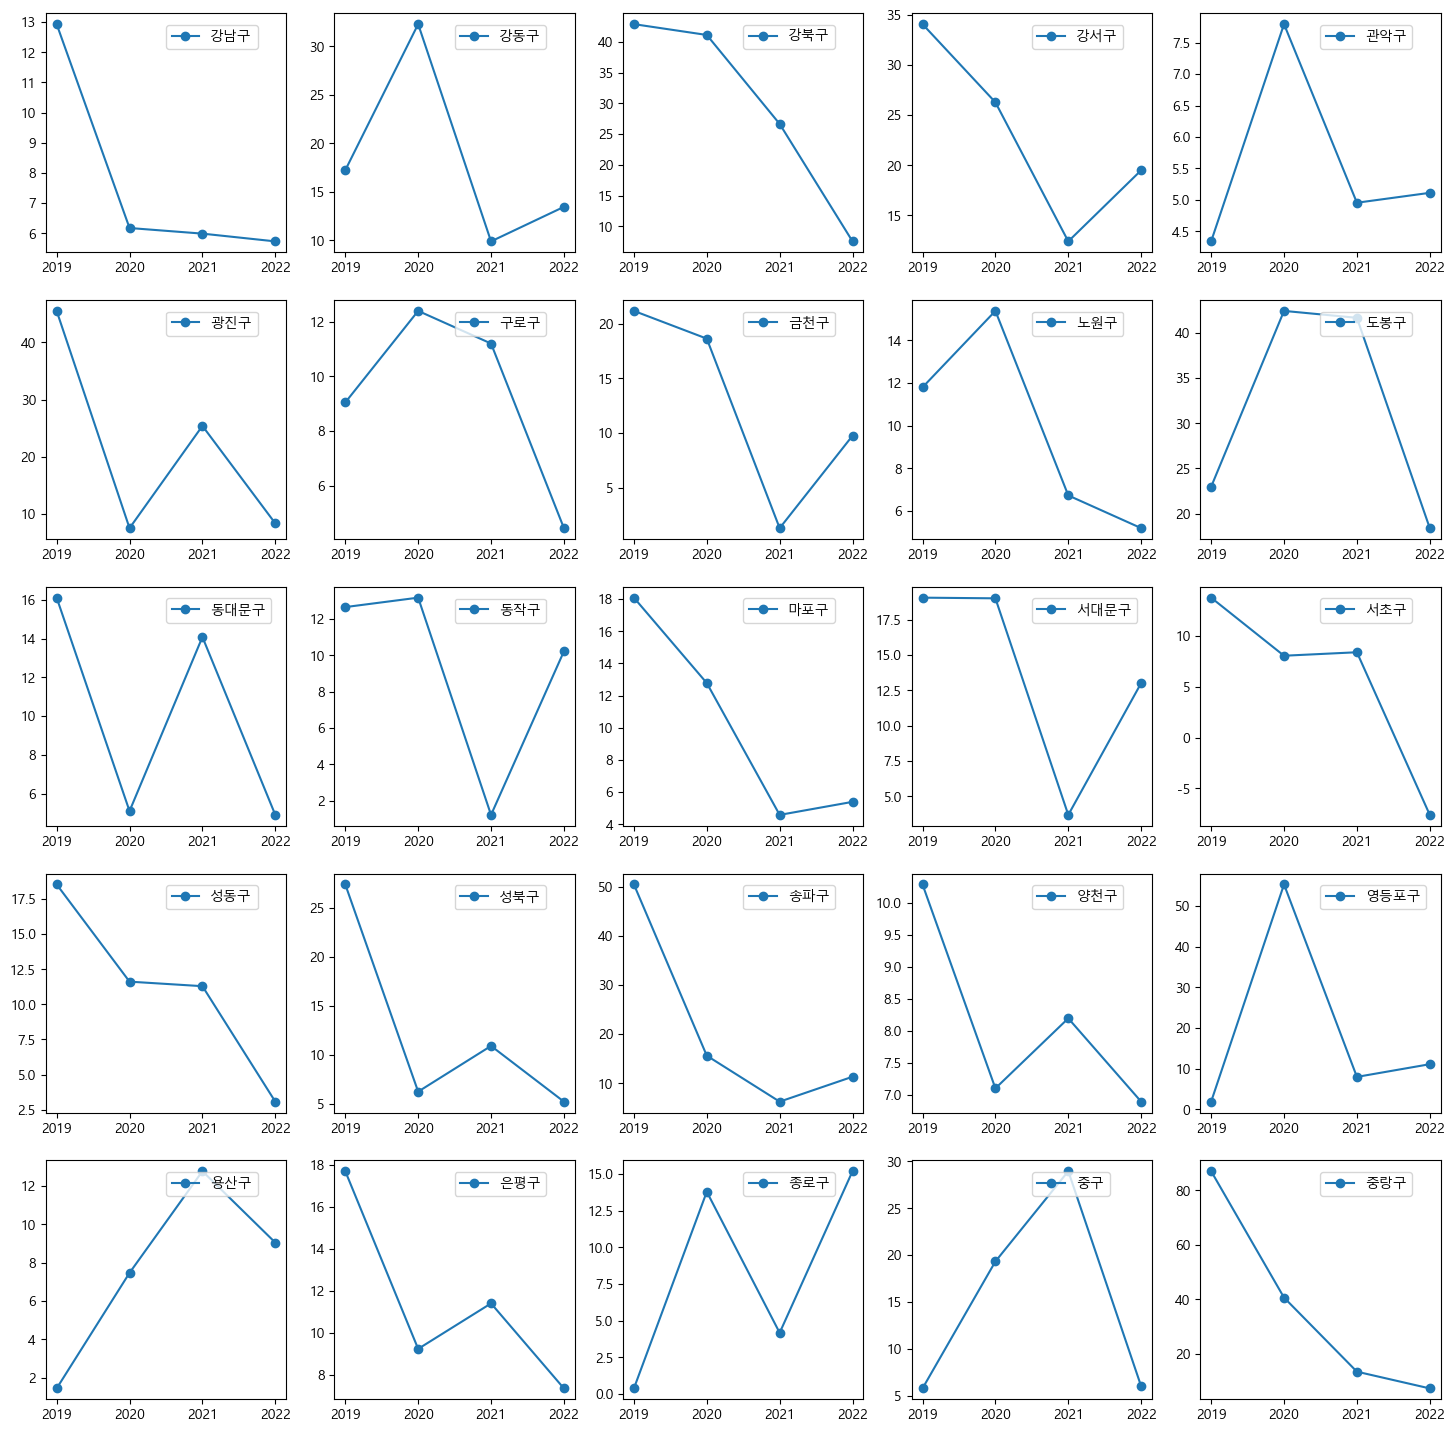

In [ ]:
# 그래프 각각 그리기

plt.figure(figsize=(18,18))
for i in range(1,26):

    plt.subplot(5,5,i)
    plt.plot(delta_cctv_df.iloc[i-1,:], marker='o', label=cctv_df.index[i-1])
    plt.legend(loc=(0.5,0.85))

